In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

import warnings
warnings.filterwarnings("ignore")

from utils import *

%load_ext autoreload
%autoreload 2

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### Loading data and cleaning

In [2]:
data = pd.read_csv('data/STARKIST_MODEL_NBR_1_DT043021_VERSION1.csv').iloc[:,:-1]

In [3]:
data.head()

DIGITAL_HX  DIGITAL_TREMOR  DIGITAL_OGURY  TV_PRIMEACCESS  TV_LATEFRINGE  \
0        1.39             0.0            0.0             0.0            0.0   
1        1.00             0.0            0.0            13.0           11.0   
2       13.00             0.0            0.0             0.0            0.0   
3        0.00             0.0            0.0             0.0            1.0   
4        0.00             0.0            0.0             0.0            1.0   

   TV_PRIME  TV_DAYTIME  TV_EARLYMORNING  TV_EARLYFRINGE  TV_OVERNIGHT  ...  \
0       0.0         0.0              0.0             0.0           0.0  ...   
1      34.0        23.0              0.0            43.0           0.0  ...   
2       0.0         0.0              0.0             0.0           0.0  ...   
3       0.0         3.0              0.0             1.0           0.0  ...   
4       1.0         0.0              0.0             0.0           0.0  ...   

   TV_SMITHSONIANNETWORK  TV_SYFY  TV_THELEARNINGCHANNEL  TV_TRUTV  TV_TVONE  \
0                    0.0      0.0                    0.0       0.0       0.0   
1                    0.0      0.0                    0.0       0.0       0.0   
2                    0.0      0.0                    0.0       0.0       0.0   
3                    0.0      0.0                    0.0       0.0       0.0   
4                    0.0      0.0                    0.0       0.0       0.0   

   TV_USANETWORK  TV_VH1  TV_WETV  TOTAL_IMPS  TOTAL_CONV  
0            0.0     0.0      0.0        1.39          16  
1            0.0     0.0      0.0      258.00           0  
2            0.0     0.0      0.0       13.00           0  
3            1.0     0.0      0.0       15.00           0  
4            0.0     0.0      0.0        6.00           0  

[5 rows x 51 columns]

In [4]:
# checking for Nan values in columns
data.isna().sum().sum()

0

### Checking target distribution

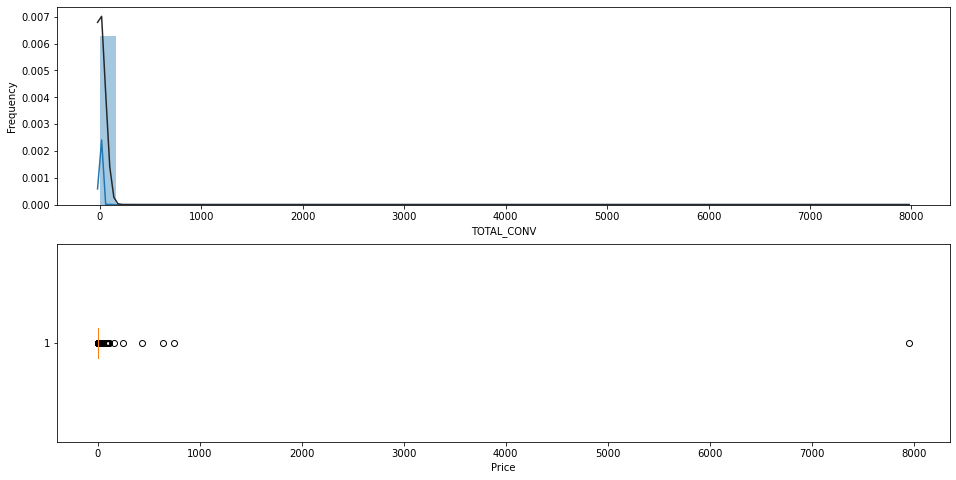

In [5]:
target_distribution(data.TOTAL_CONV)

In [6]:
# checking for rows where total impresions == 0
data = data.drop(index=data[data.TOTAL_IMPS==0].index[0]) 

data = data.drop(columns=['TOTAL_IMPS'])
data = data.loc[(data['TOTAL_CONV']>0) & (data['TOTAL_CONV']<500)] # Select only with CONV RATE > 0
# data = data.drop(index=180)

# Checking for sum of 0 values in the columns
# Summing up values by columns and extracts columns with sum = 0
data = data[[col for col in data.columns if col not in data.sum(axis=0)[data.sum(axis=0)==0].index]]

In [7]:
# target_distribution(data.TOTAL_CONV)

### Checking for Multicolinearity

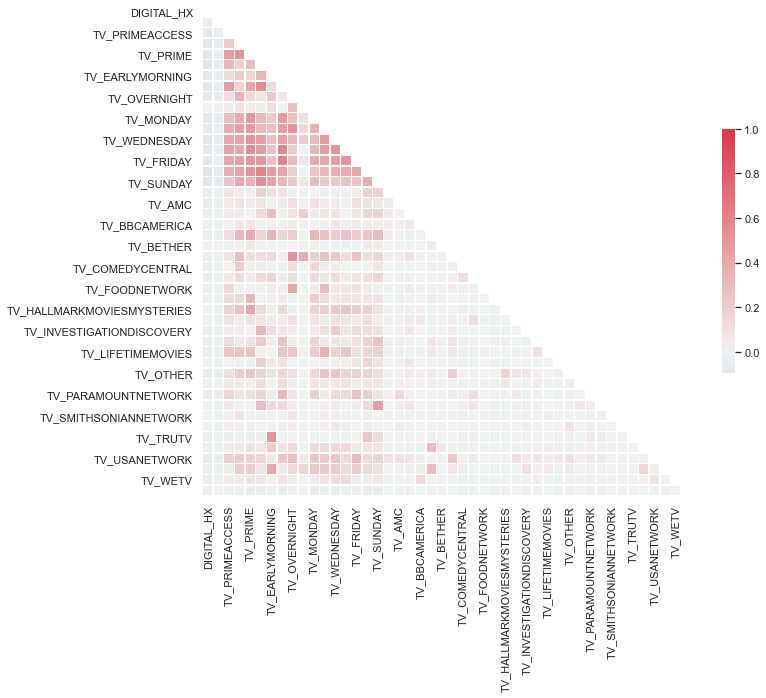

Based on threshold 0.8 , there is no highly corelated features


In [135]:
features_corr_matrix(data, 0.8)

### Grouping Channels

In [136]:
tv_digital = data[['DIGITAL_HX','DIGITAL_TREMOR','TOTAL_CONV']]

In [137]:
tv_data = data[['TV_MONDAY','TV_TUESDAY','TV_WEDNESDAY','TV_THURSDAY','TV_FRIDAY','TV_SATURDAY','TV_SUNDAY','TOTAL_CONV']]

In [138]:
tv_daypart = data[['TV_PRIMEACCESS','TV_LATEFRINGE','TV_PRIME','TV_DAYTIME','TV_EARLYMORNING','TV_EARLYFRINGE','TV_OVERNIGHT','TOTAL_CONV']]

In [139]:
tv_network = data[['TV_ANE','TV_AMC','TV_ANIMALPLANET','TV_BBCAMERICA','TV_BET','TV_BETHER','TV_BRAVO','TV_COMEDYCENTRAL',
                   'TV_COUNTRYMUSICTELEVISION','TV_FOODNETWORK','TV_GAMESHOWNETWORK','TV_IFC','TV_INVESTIGATIONDISCOVERY',
                   'TV_LIFETIME','TV_LIFETIMEMOVIES','TV_OPRAHWINFREYNETWORK','TV_OTHER','TV_OVATIONTV','TV_PARAMOUNTNETWORK',
                   'TV_POP','TV_SMITHSONIANNETWORK','TV_SYFY','TV_TRUTV','TV_TVONE','TV_USANETWORK','TV_VH1','TV_WETV','TOTAL_CONV']]

### Relationship with Target Variable

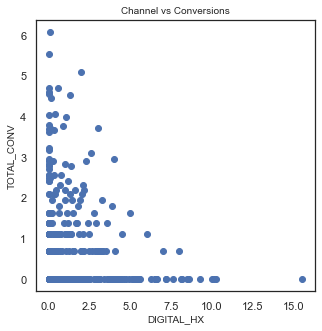

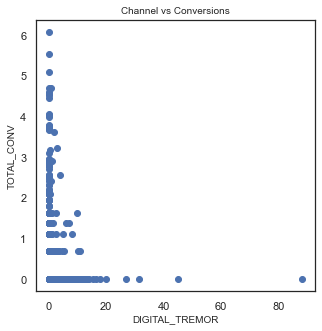

In [149]:
plot_relationship(tv_digital, 'TOTAL_CONV')

### Saving Data to CSV files

In [152]:
tv_digital.to_csv('data/tv_digital.csv', index = False)
tv_data.to_csv('data/tv_data.csv', index = False)
tv_daypart.to_csv('data/tv_daypart.csv', index = False)
tv_network.to_csv('data/tv_network.csv', index = False)